In [17]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn #remove unnecessary warnings

In [18]:
data = pd.read_csv('biddings1.csv')
dfo = pd.DataFrame(data)
dfor = dfo.drop(['Unnamed: 0'], axis=1) #empty column

In [19]:
dfor = dfor.sort_values(by=['convert'])
dfor = dfor.reset_index(drop=True)

df1 = dfor.drop(dfo.index[0:400])


In [20]:
df = df1.reset_index(drop=True) #reset index

#Convert column = shown ad was clicked: 1 = clicked ad
print(df.convert.value_counts())

df.tail()

0    5692
1    1908
Name: convert, dtype: int64


,0,1,2,3,4,5,6,7,8,9,...,79,80,81,82,83,84,85,86,87,convert
7595,-0.00,-2.05,-1.77,0.04,1.51,-4.25,0.39,4.84,-4.50,-2.68,...,1.63,-0.40,-0.09,0.16,1.66,0.16,-0.08,-0.00,0.05,1
7596,-0.01,-0.30,2.32,-0.56,0.79,0.19,-0.29,0.22,-0.21,0.28,...,-0.16,-0.75,0.53,0.60,0.01,0.32,-0.23,0.13,-0.04,1
7597,-0.01,0.71,2.30,-0.23,-0.67,-0.05,0.24,0.11,0.43,0.55,...,-0.19,0.39,1.06,0.05,-0.87,-0.01,1.79,-0.76,0.22,1
7598,-0.02,2.07,2.10,0.05,0.83,0.12,-0.19,0.31,-0.16,-0.13,...,0.16,-0.17,0.77,0.76,-0.06,0.43,-0.75,0.27,-0.08,1
7599,-0.01,-0.76,-4.40,-0.19,-0.76,2.45,0.92,-0.50,-0.18,0.01,...,0.01,-1.22,0.24,0.22,0.31,0.10,0.13,-0.17,0.08,1


In [21]:
from sklearn.model_selection import train_test_split

x = df.drop(['convert'],axis=1) #training features
y = df.convert #target

#Set our train/test values
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                  test_size = .10)
#Test sample
y_test.value_counts()


0    583
1    177
Name: convert, dtype: int64

In [22]:
from collections import Counter
from imblearn.under_sampling import EditedNearestNeighbours

enn = EditedNearestNeighbours(n_neighbors=3, random_state=42)
x_resampled, y_resampled = enn.fit_resample(x_train, y_train)

print(sorted(Counter(y_resampled).items()))

[(0, 2592), (1, 1731)]


In [23]:
#First model using our undersampled data
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

clf = LinearSVC(random_state=42)
clf.fit(x_resampled, y_resampled) 

print('Training accuracy LinearSVC is: %0.2f' % (clf.score(x_resampled, y_resampled)))
print('Test accuracy LinearSVC is: %0.2f' % (clf.score(x_test, y_test)))

scores = cross_val_score(clf, x_resampled, y_resampled, cv=5)
print("Cross Val LinearSVC Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

y_pred = clf.predict(x_test) #predict y based on x_test
print(classification_report(y_test, y_pred)) #true value vs predicted value

print('\nThis LinearSVC runs at a speed of:')
%timeit clf.predict(df.iloc[5:6, :88])

Training accuracy LinearSVC is: 0.74
Test accuracy LinearSVC is: 0.69
Cross Val LinearSVC Accuracy: 0.73 (+/- 0.02)

              precision    recall  f1-score   support

           0       0.86      0.72      0.78       583
           1       0.40      0.61      0.48       177

   micro avg       0.69      0.69      0.69       760
   macro avg       0.63      0.67      0.63       760
weighted avg       0.75      0.69      0.71       760


This LinearSVC runs at a speed of:
1.12 ms ± 145 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [24]:
from sklearn.metrics import f1_score

#Show f1 score 
print("LinearSVC F1 Score: %0.2f \n" % f1_score(y_test, y_pred))


LinearSVC F1 Score: 0.48 



In [25]:
#First model using our undersampled data
from sklearn.linear_model import LogisticRegression

log = LogisticRegression(random_state=42)
log.fit(x_resampled, y_resampled) 

print('Training accuracy Log is: %0.2f' % (log.score(x_resampled, y_resampled)))
print('Test accuracy Log is: %0.2f' % (log.score(x_test, y_test)))

scores = cross_val_score(log, x_resampled, y_resampled, cv=5)
print("Cross Val Log Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

y_pred1 = log.predict(x_test) #predict y based on x_test
print(classification_report(y_test, y_pred1)) #true value vs predicted value

print('\nThis Log runs at a speed of:')
%timeit log.predict(df.iloc[5:6, :88])

Training accuracy Log is: 0.74
Test accuracy Log is: 0.70
Cross Val Log Accuracy: 0.73 (+/- 0.02)

              precision    recall  f1-score   support

           0       0.86      0.73      0.79       583
           1       0.41      0.62      0.49       177

   micro avg       0.70      0.70      0.70       760
   macro avg       0.63      0.67      0.64       760
weighted avg       0.76      0.70      0.72       760


This Log runs at a speed of:
1.14 ms ± 116 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


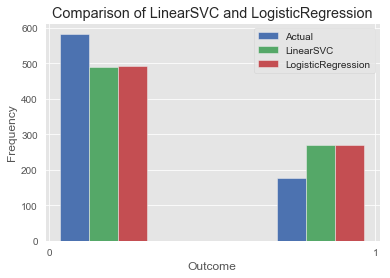

In [26]:
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
plt.style.use('seaborn-deep')
import matplotlib.ticker as ticker

fig, ax = plt.subplots()
tick_spacing = 1

plt.hist([y_test, y_pred, y_pred1], bins=3, label=['Actual', 'LinearSVC', 'LogisticRegression'])
ax.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))

plt.ylabel('Frequency')
plt.xlabel('Outcome')
plt.title('Comparison of LinearSVC and LogisticRegression')
plt.legend(loc='upper right')
plt.show()

In [56]:
# Import the model.
from sklearn.neural_network import MLPClassifier

# Establish and fit the model, with a single, 1000 perceptron layer.
mlp = MLPClassifier(activation='logistic', hidden_layer_sizes=(1500, 5), 
                    solver='sgd', learning_rate='adaptive',
                    random_state=42)

mlp.fit(x_resampled, y_resampled)

print('Training accuracy MLP is: %0.2f' % (mlp.score(x_resampled, y_resampled)))
print('Test accuracy MLP is: %0.2f' % (mlp.score(x_test, y_test)))

# scores = cross_val_score(mlp, x_resampled, y_resampled, cv=5)
# print("Cross Val MLP Accuracy: %0.2f (+/- %0.2f)\n" % (scores.mean(), scores.std() * 2))

y_pred1 = mlp.predict(x_test) #predict y based on x_test
print(classification_report(y_test, y_pred1)) #true value vs predicted value

print('\nThis MLP runs at a speed of:')
%timeit mlp.predict(df.iloc[5:6, :88])

Training accuracy MLP is: 0.72
Test accuracy MLP is: 0.74
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       583
           1       0.44      0.45      0.44       177

   micro avg       0.74      0.74      0.74       760
   macro avg       0.63      0.64      0.63       760
weighted avg       0.74      0.74      0.74       760


This MLP runs at a speed of:
1.41 ms ± 77.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [32]:
mlp.get_params

<bound method BaseEstimator.get_params of MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300, 5), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)>